**LangGraph with Rag application which have vectorDB search, web search and generic search**

Install langgraph

In [ ]:
pip install langgraph

**Create a state**

In [7]:
#import necessary packages for state machine and graph
from typing import Annotated, Literal
from typing_extensions import TypedDict
from langgraph.graph import StateGraph ,START , END
from langgraph.graph.message import add_messages
from pydantic import BaseModel, Field

In [8]:
class State(TypedDict):
  messages : Annotated[list[str],add_messages]
  user_input: str
  message_type: str

**VectorDB Search**


*   Split the data(csv, PDF or webpage ...)
*   Vector embeddings:> convert splits(Chunks) into vector embedding's
*   create vectorDB with embeddings
*   Create vectorDB search method




In [1]:
pip install langchain_chroma

In [2]:
pip install langchain-community

In [3]:
pip install pypdf

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 330.6/330.6 kB 6.4 MB/s eta 0:00:00


# Create a prompt message for input file as follows: generate a dummy pdf which contains three company profiles and each financial details have one page and don't use table format


In [3]:
from langchain_community.document_loaders import PyPDFLoader

file_path = "/content/company_financial_profiles.pdf"
loader = PyPDFLoader(file_path)
pages = loader.load_and_split()

In [4]:
from langchain_text_splitters import RecursiveCharacterTextSplitter

text_splitter = RecursiveCharacterTextSplitter(
    chunk_size=500, chunk_overlap=100
)
all_splits = text_splitter.split_documents(pages)

print(len(all_splits))

3


In [6]:
pip install langchain_huggingface

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 566.4/566.4 kB 10.1 MB/s eta 0:00:00
  Attempting uninstall: huggingface-hub
    Found existing installation: huggingface_hub 1.4.0
    Uninstalling huggingface_hub-1.4.0:
      Successfully uninstalled huggingface_hub-1.4.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
transformers 5.0.0 requires huggingface-hub<2.0,>=1.3.0, but you have huggingface-hub 0.36.2 which is incompatible.


In [7]:
pip install sentence-transformers huggingface-hub==0.33.4

INFO: pip is looking at multiple versions of transformers to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 3.1 MB/s eta 0:00:00
INFO: pip is still looking at multiple versions of transformers to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.1/40.1 kB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.2/42.2 kB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.1/40.1 

In [1]:
from langchain_huggingface import HuggingFaceEmbeddings
embedding_model = HuggingFaceEmbeddings(model = "sentence-transformers/all-MiniLM-L6-v2")

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [5]:
from langchain_chroma import Chroma
vectorDB = Chroma.from_documents(
    all_splits, embedding_model,persist_directory="/content/VectorDB"
)

In [9]:
def vector_db(state:State):
  user_input = state['user_input']
  vectordb = Chroma(
    embedding_function=embedding_model,
    persist_directory="/content/VectorDB")
  relvant_chunks = vectordb.as_retriever().invoke(user_input)
  final_chunk = "\n\n".join([chunk.page_content for chunk in relvant_chunks ])
  return {"messages":[{"role":"assistant","content": final_chunk}]}


**Create Web Search**

In [10]:
from langchain_community.tools import TavilySearchResults
import os
os.environ["TAVILY_API_KEY"] = "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"

In [11]:
def web_search(state:State):
  user_input = state['user_input']
  search_results = TavilySearchResults(max_results=3).invoke(user_input)
  return {"messages":[{"role":"assistant","content": search_results}]}

Create Generic Search

In [12]:
pip install langchain_groq

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 137.5/137.5 kB 3.6 MB/s eta 0:00:00


In [13]:

from google.colab import userdata


In [14]:
from langchain_groq import ChatGroq

llm= ChatGroq(model= "llama-3.1-8b-instant",api_key= userdata.get('GROQ_API_KEY'))

In [15]:
def generic_search(state: State):
  print("inside generic search")
  user_input_message = state["user_input"]
  system_prompt = '''
                  you are a helpful assistant. generate response for user query on clear and concise manner
                  '''
  prompt_message = [
      {
          "role": "system",
          "content":system_prompt
      },
      {
         "role":"user",
         "content":  user_input_message
      }
  ]

  result = llm.invoke(prompt_message)
  print("generic search output is ,",result )
  return {"messages":[{"role":"assistant","content":result.content}]}

**Create Final Response**

In [16]:
def final_response(state:State):
  print("inside final response")
  user_input = state["user_input"]
  context = state["messages"][-1].content
  user_prompt = f'''generate concise response for user query : {user_input} for given context: {context} '''
  message = [
      {
          "role":"user",
          "content":user_prompt
      }
  ]
  response = llm.invoke(message)
  return {"messages":[{"role":"assistant","content": response.content}]}


**Create LangGraph**

In [17]:
class MessageClassifier(BaseModel):
  message_type: Literal["vector_db","web_search","generic_search"] =Field(description="classify user input to vector_db , web_search and generic_search")

In [18]:
def router_message(state: State):
  user_input_message = state["messages"][-1].content
  classifier_llm = llm.with_structured_output(MessageClassifier)
  system_prompt = '''
                  classify user message to 'vector_db' , 'web_search' , 'generic_search' based on below criteria:
                  'vector_db': if user queryy is asking about specific company  name and its details
                  'web_search': if user query is related to current/ latest/ today information and need web search
                  'generic_search': if user query is related to gneric information not latest information where LLM can give answer by its own knowledge
                  '''
  prompt_message = [
      {
          "role": "system",
          "content":system_prompt
      },
      {
         "role":"user",
         "content":  user_input_message
      }
  ]

  result = classifier_llm.invoke(prompt_message)
  print("router output is: ", result)
  return {"messages":[{"role":"assistant","content":result.message_type}],"user_input":user_input_message,"message_type":result.message_type}

In [19]:
graph_builder = StateGraph(State)

In [20]:
graph_builder.add_node("router",router_message)
graph_builder.add_node("vector_db",vector_db)
graph_builder.add_node("web_search",web_search)
graph_builder.add_node("generic_search",generic_search)
graph_builder.add_node("final_response",final_response)
graph_builder.add_edge(START,"router")
graph_builder.add_conditional_edges("router",lambda state: state.get("message_type"),{"vector_db":"vector_db","web_search":"web_search","generic_search":"generic_search"})
graph_builder.add_edge("vector_db","final_response")
graph_builder.add_edge("web_search","final_response")
graph_builder.add_edge("generic_search","final_response")
graph_builder.add_edge("final_response",END)

In [21]:
workflow = graph_builder.compile()

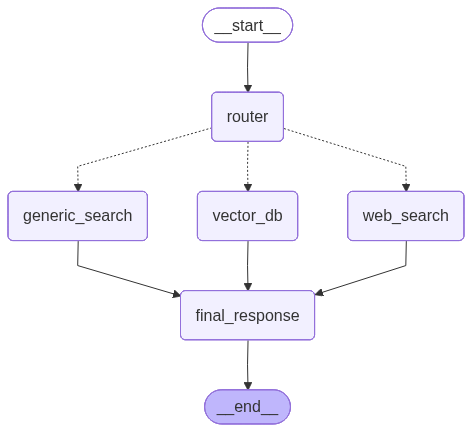

In [22]:
workflow

In [31]:
user_input = input("provide the qurey ")

provide the qurey Who is the president of USA?


In [32]:
response = workflow.invoke({"messages":[{"role":"user","content":user_input}]})

router output is:  message_type='generic_search'
inside generic search
generic search output is , content='The current President of the United States is Joe Biden. He took office on January 20, 2021.' additional_kwargs={} response_metadata={'token_usage': {'completion_tokens': 24, 'prompt_tokens': 58, 'total_tokens': 82, 'completion_time': 0.035482463, 'completion_tokens_details': None, 'prompt_time': 0.003921493, 'prompt_tokens_details': None, 'queue_time': 0.006027554, 'total_time': 0.039403956}, 'model_name': 'llama-3.1-8b-instant', 'system_fingerprint': 'fp_8f8420ecd7', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None, 'model_provider': 'groq'} id='lc_run--019c63ff-c4b6-7743-a1c0-624dadffa6c0-0' tool_calls=[] invalid_tool_calls=[] usage_metadata={'input_tokens': 58, 'output_tokens': 24, 'total_tokens': 82}
inside final response


In [33]:
print(response['messages'][-1].content)

The current President of the United States is Joe Biden.
